In [148]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import scipy

In [149]:
df = pd.read_csv("FTAs by Country.csv")
df

,Country,Agreement,Status,Year
0,Afghanistan,Afghanistan-India Preferential Trading Agreement,Signed and In Effect,2003
1,Afghanistan,Afghanistan-Pakistan Free Trade Agreement,Proposed/Under consultation and study,2005
2,Afghanistan,Economic Cooperation Organization Trade Agreement,Signed and In Effect,2008
3,Afghanistan,Iran-Afghanistan PTA,Proposed/Under consultation and study,2021
4,Armenia,Armenia-Georgia Free Trade Area,Signed and In Effect,1998
...,...,...,...,...
855,Viet Nam,Viet Nam-European Union Free Trade Agreement,Signed and In Effect,2020
856,Viet Nam,Viet Nam-Israel Free Trade Agreement,Signed but not yet In Effect,2023
857,Viet Nam,Viet Nam-MERCOSUR Free Trade Agreement,Proposed/Under consultation and study,2023
858,Viet Nam,Viet Nam-Ukraine FTA,Proposed/Under consultation and study,2012


In [150]:
agreement_dict = {}
for index, row in df.iterrows():
    agreement = row['Agreement']
    country = row['Country']
    if agreement in agreement_dict:
        agreement_dict[agreement].append(country)
    else:
        agreement_dict[agreement] = [country]

for agreement in list(agreement_dict.keys()):
    if len(agreement_dict[agreement]) == 1:
        del agreement_dict[agreement]

# agreement_dict

In [151]:
lst = []
for agreement in agreement_dict:
    lst.append(agreement_dict[agreement])

u = (pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())

v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0

print(v)

                                 Afghanistan  Armenia  Australia  Azerbaijan  \
Afghanistan                                0        0          0           1   
Armenia                                    0        0          0           0   
Australia                                  0        0          0           0   
Azerbaijan                                 1        0          0           0   
Bangladesh                                 0        0          0           0   
Bhutan                                     0        0          0           0   
Brunei Darussalam                          0        1          6           0   
Cambodia                                   0        2          3           0   
China, People's Republic of                0        1          4           0   
Cook Islands                               0        0          2           0   
Fiji                                       0        0          2           0   
Georgia                                 

/tmp/ipykernel_31493/1730214989.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(level=0, axis=1)


In [152]:
v.values[np.tril(np.ones(v.shape)).astype(bool)] = 0

print(v)

                                 Afghanistan  Armenia  Australia  Azerbaijan  \
Afghanistan                                0        0          0           1   
Armenia                                    0        0          0           0   
Australia                                  0        0          0           0   
Azerbaijan                                 0        0          0           0   
Bangladesh                                 0        0          0           0   
Bhutan                                     0        0          0           0   
Brunei Darussalam                          0        0          0           0   
Cambodia                                   0        0          0           0   
China, People's Republic of                0        0          0           0   
Cook Islands                               0        0          0           0   
Fiji                                       0        0          0           0   
Georgia                                 

In [153]:
a = v.stack()
a = a[a >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
print(a)

           source           target  weight
0     Afghanistan       Azerbaijan       1
1     Afghanistan            India       1
2     Afghanistan       Kazakhstan       1
3     Afghanistan  Kyrgyz Republic       1
4     Afghanistan         Pakistan       2
..            ...              ...     ...
418      Thailand         Viet Nam      16
419         Tonga           Tuvalu       4
420         Tonga          Vanuatu       4
421  Turkmenistan       Uzbekistan       1
422        Tuvalu          Vanuatu       4

[423 rows x 3 columns]


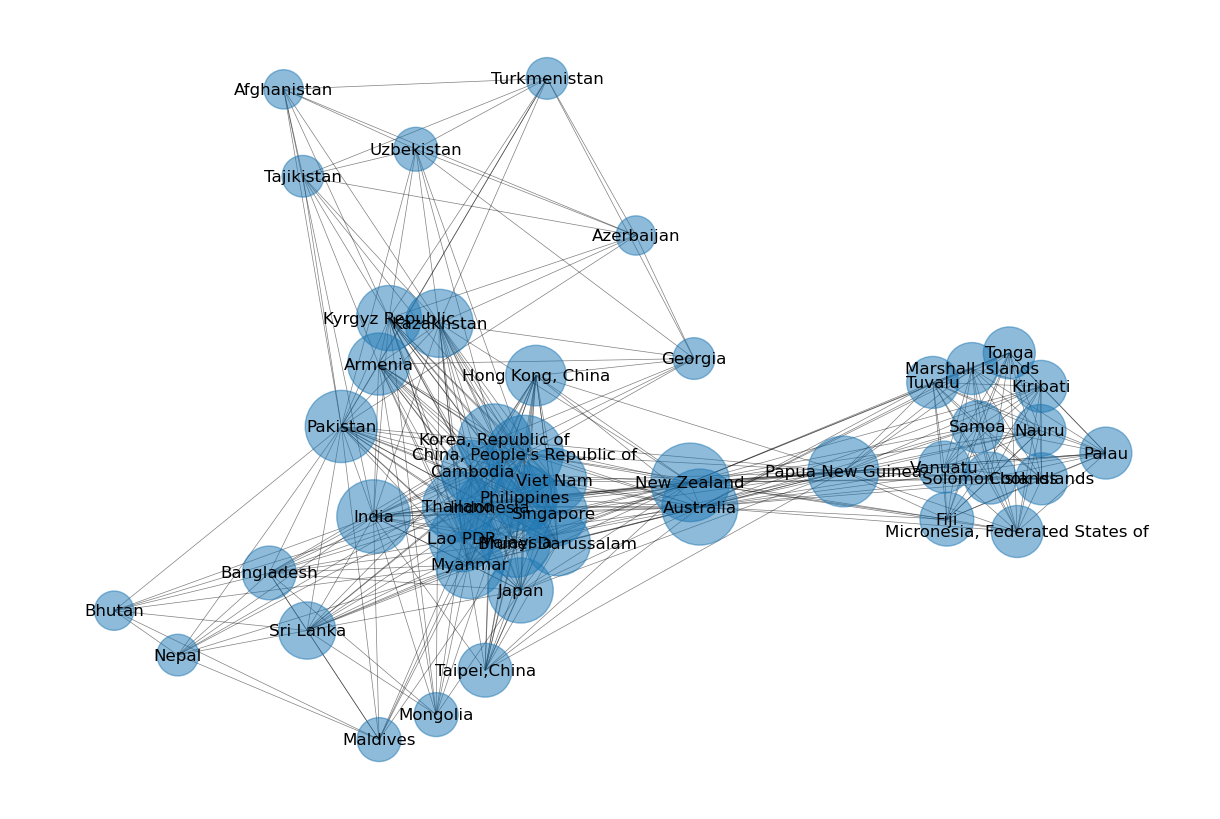

In [154]:
G = nx.from_pandas_edgelist(a, edge_attr=True)

pos = nx.spring_layout(G, k=0.8, iterations=50)
# pos = nx.spring_layout(G, k=2)

# pos = nx.spectral_layout(G)
# scale_factor_x = 2  # Adjust the scale factor for x-axis as needed
# scale_factor_y = 7  # Adjust the scale factor for y-axis as needed
# pos = {node: (pos[node][0] * scale_factor_x, pos[node][1] * scale_factor_y) for node in pos}

node_sizes = [G.degree(n) * 100 for n in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=node_sizes, width=0.5, edge_color='black', alpha=0.5)
nx.draw_networkx_labels(G, pos)

# plt.savefig("network_graph.png", dpi=300)
plt.show()